In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random
import pandas as pd 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from datetime import datetime
from packaging import version
import cv2
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings('ignore')

In [53]:
#loading the saved model
new_model=tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/bestmodel.hdf5")

In [64]:
def imagePreprocess(imageFullPath):
  img=cv2.imread(imageFullPath)
  #plt.imshow(img, cmap='gray')
  #print('Original Dimensions : ',img.shape)
  width = 256
  height = 256
  dim = (width, height)

  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
  #print('Resized Dimensions : ',resized.shape)
  cv2_imshow(resized)
  #reshaping the image to make it compatible for the argument of predict function
  myImage=resized.reshape(-1,256,256,3)
  #print('Reshaped Dimensions : ',myImage.shape)
  return myImage

-----------------------------------------------------------


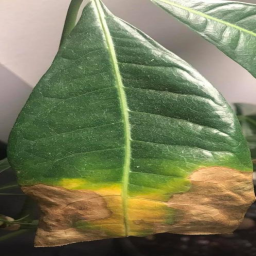

Diseased
      Healthy  Diseased
 6.295031e-21       1.0
-----------------------------------------------------------
-----------------------------------------------------------


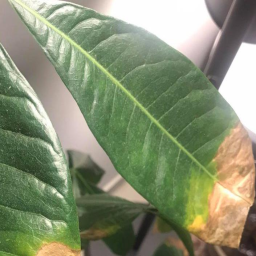

Healthy
  Healthy  Diseased
 0.777111  0.222889
-----------------------------------------------------------
-----------------------------------------------------------


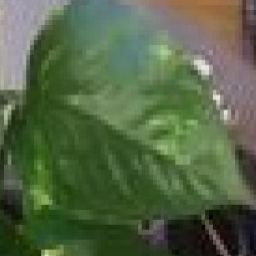

Healthy
  Healthy  Diseased
 0.976491  0.023509
-----------------------------------------------------------
-----------------------------------------------------------


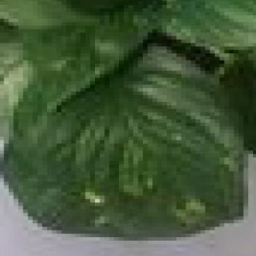

Healthy
  Healthy  Diseased
 0.996389  0.003611
-----------------------------------------------------------
-----------------------------------------------------------


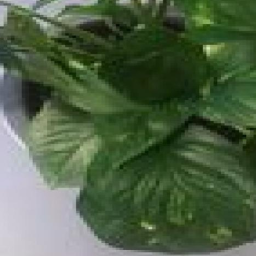

Healthy
  Healthy  Diseased
 0.527765  0.472235
-----------------------------------------------------------


In [67]:
#predicting a image using the model
categories=["Healthy","Diseased"]
#fullImagePath='/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/croppedImages/1_resize-1608813444383050788sickleaf.jpg'
image_list = "/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/croppedImages/"
for path in os.listdir(image_list):
    imageFullPath = os.path.join(image_list, path)
    if os.path.isfile(imageFullPath):
        print("-----------------------------------------------------------")
        preprocessedImage = imagePreprocess(imageFullPath)
        
        #predicting the class of the image
        predict_class=new_model.predict_classes(preprocessedImage)
        imageCategory = categories[predict_class[0]]
        print(imageCategory)
        #statistics
        pred = new_model.predict(preprocessedImage)
        res = pd.DataFrame()
        res['Healthy'] = pred[:, 0]
        res['Diseased'] = pred[:, 1]
        print(res.to_string(index=False))


        print("-----------------------------------------------------------")